<a href="https://colab.research.google.com/github/Atharva-Parab2004/quiz-app/blob/main/Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/product_sales_data_100_rows.csv')
df

,Date,Product,Region,Name,Units,Sales
0,2024-11-23,Smartphone,North,Sophia Wilson,9,1008
1,2024-04-24,Tablet,North,Sophia Wilson,18,1296
2,2024-10-29,Keyboard,North,John Doe,3,315
3,2024-04-29,Laptop,South,Sophia Wilson,18,2826
4,2024-04-22,Mouse,East,Daniel Miller,1,90
...,...,...,...,...,...,...
95,2024-02-02,Keyboard,West,Emily Johnson,18,3042
96,2024-07-31,Laptop,South,Daniel Miller,14,2086
97,2024-10-26,Laptop,West,Michael Brown,1,140
98,2024-06-01,Keyboard,West,Chris Davis,18,1908


/tmp/ipython-input-1740366163.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, estimator=sum, palette='deep')


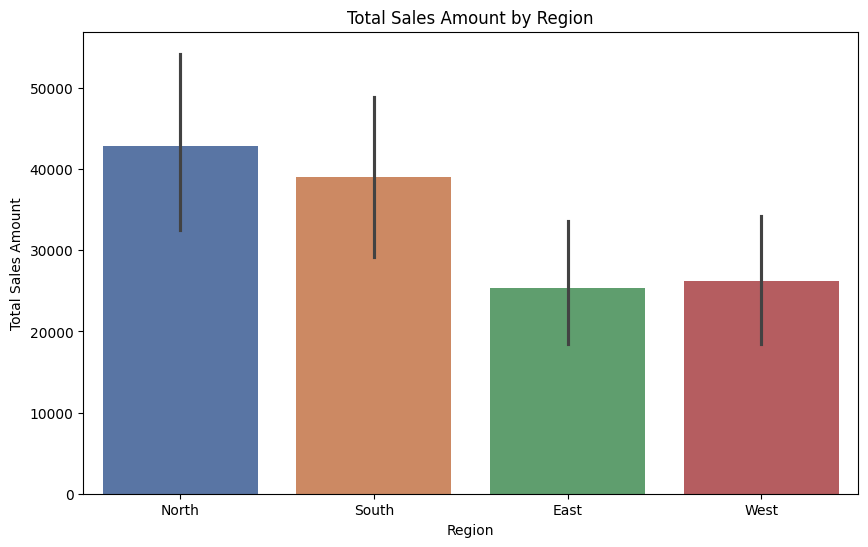

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum, palette='deep')
plt.title('Total Sales Amount by Region')
plt.ylabel('Total Sales Amount')
plt.xlabel('Region')
plt.show()

In [ ]:
# Import core libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Aesthetic settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis')
sns.set(font_scale=1.1)

In [ ]:
print("\n--- BASIC INFO ---")
df.info()
print("\n--- SUMMARY ---")
print(df.describe().T)
print("\n--- MISSING VALUES ---")
print(df.isnull().sum())


--- BASIC INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     100 non-null    object
 1   Product  100 non-null    object
 2   Region   100 non-null    object
 3   Name     100 non-null    object
 4   Units    100 non-null    int64 
 5   Sales    100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB

--- SUMMARY ---
       count     mean         std   min     25%     50%     75%     max
Units  100.0    10.70    6.057802   1.0    4.75    10.0    17.0    20.0
Sales  100.0  1333.46  932.008599  77.0  557.25  1229.0  1918.5  3880.0

--- MISSING VALUES ---
Date       0
Product    0
Region     0
Name       0
Units      0
Sales      0
dtype: int64


In [ ]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
print("✅ Cleaned Column Names:", df.columns.tolist())

✅ Cleaned Column Names: ['date', 'product', 'region', 'name', 'units', 'sales']


In [ ]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['month'] = df['date'].dt.to_period('M')

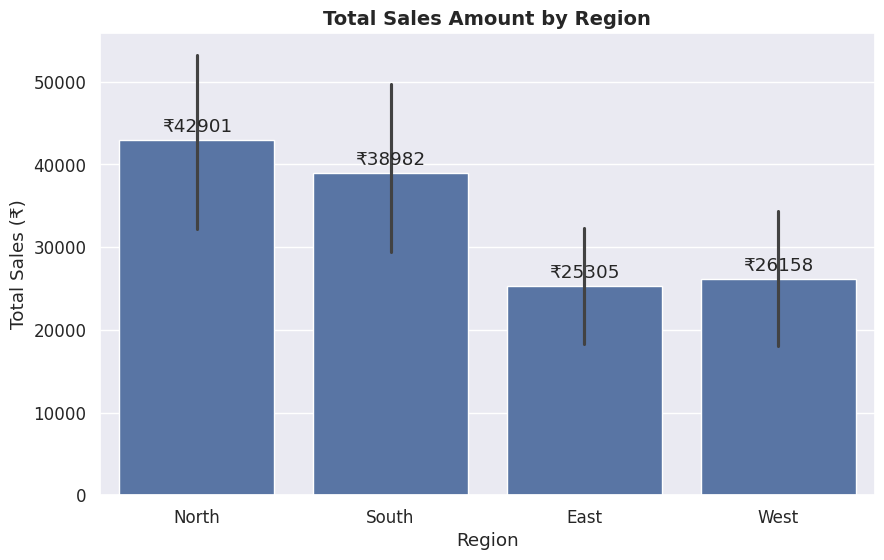

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='region', y='sales', data=df, estimator=sum)
ax.bar_label(ax.containers[0], fmt='₹%.0f', padding=3)
plt.title('Total Sales Amount by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Total Sales (₹)')
plt.show()

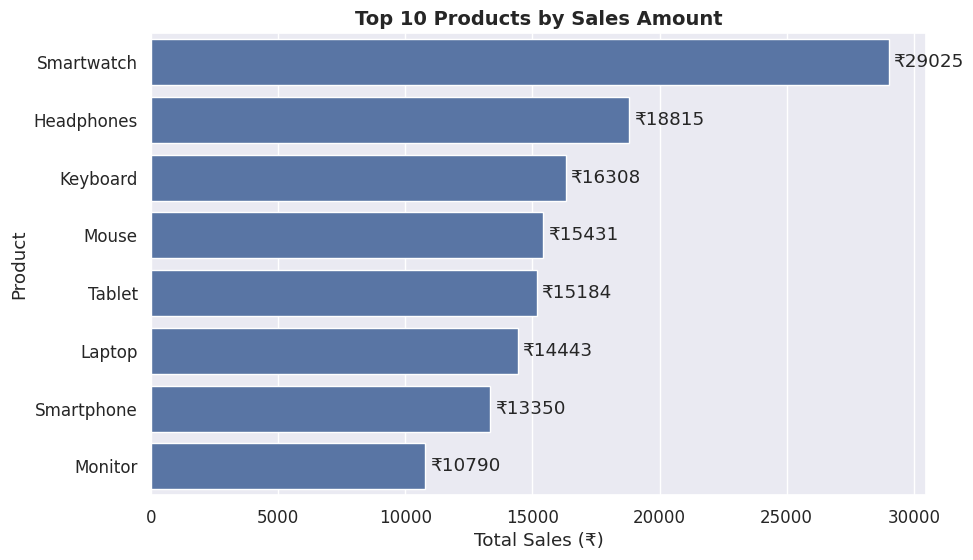

In [ ]:
top_products = (df.groupby('product')['sales']
                  .sum().sort_values(ascending=False).head(10))

plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_products.values, y=top_products.index)
ax.bar_label(ax.containers[0], fmt='₹%.0f', padding=3)
plt.title('Top 10 Products by Sales Amount', fontsize=14, fontweight='bold')
plt.xlabel('Total Sales (₹)')
plt.ylabel('Product')
plt.show()

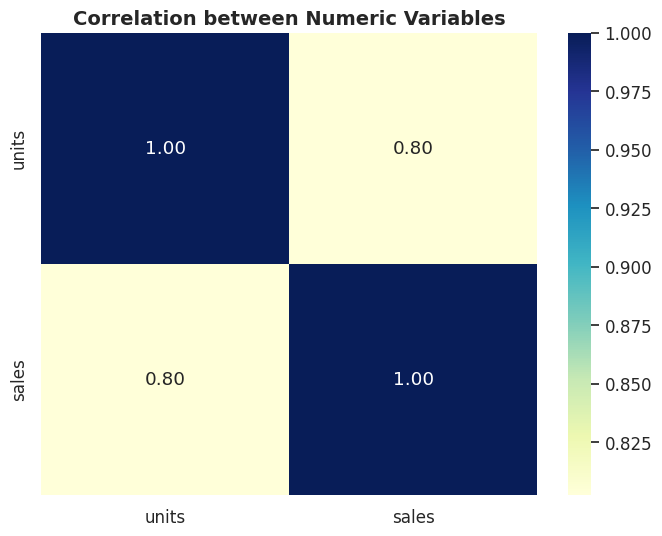

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation between Numeric Variables', fontsize=14, fontweight='bold')
plt.show()

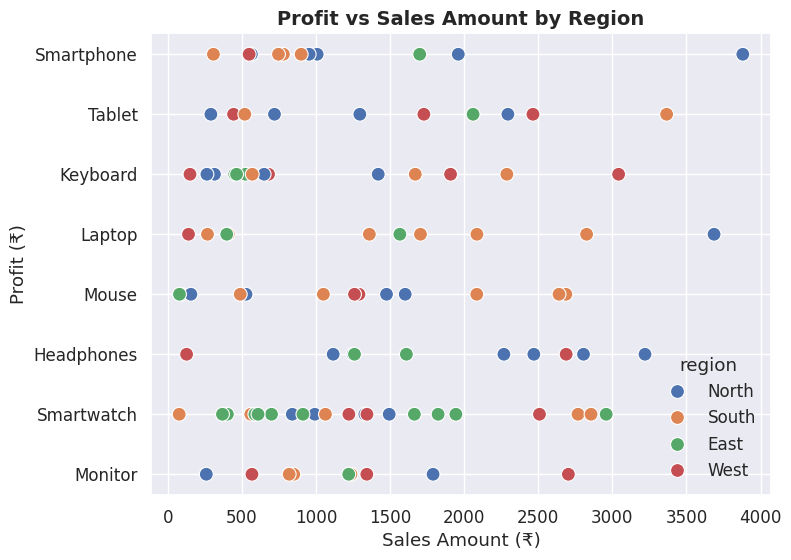

In [ ]:

plt.figure(figsize=(8,6))
sns.scatterplot(x='sales', y='product', hue='region', data=df, s=100)
plt.title('Profit vs Sales Amount by Region', fontsize=14, fontweight='bold')
plt.xlabel('Sales Amount (₹)')
plt.ylabel('Profit (₹)')
plt.show()

In [ ]:
print(df.columns.tolist())

['date', 'product', 'region', 'name', 'units', 'sales', 'month']


In [ ]:


print(" SALES ANALYSIS SUMMARY\n")

# 1️⃣ Basic Totals
total_sales = df['sales'].sum()
total_units = df['units'].sum()
unique_regions = df['region'].nunique()
unique_products = df['product'].nunique()
top_region = df.groupby('region')['sales'].sum().idxmax()
top_product = df.groupby('product')['sales'].sum().idxmax()
top_salesperson = df.groupby('name')['sales'].sum().idxmax()

print(f"• Total Sales Amount: ₹{total_sales:,.0f}")
print(f"• Total Units Sold: {total_units:,}")
print(f"• Regions Covered: {unique_regions}")
print(f"• Number of Products: {unique_products}")
print(f"• Highest Selling Region: {top_region}")
print(f"• Best-Selling Product: {top_product}")
print(f"• Top Salesperson: {top_salesperson}")

# 2️⃣ Sales by Region Summary
region_summary = df.groupby('region')['sales'].sum().sort_values(ascending=False)
print("\n📍Sales by Region:")
for region, value in region_summary.items():
    print(f"   - {region}: ₹{value:,.0f}")

# Product Summary (Top 5)
product_summary = df.groupby('product')['sales'].sum().sort_values(ascending=False).head(5)
print("\n Top 5 Products by Sales:")
for product, value in product_summary.items():
    print(f"   - {product}: ₹{value:,.0f}")

 SALES ANALYSIS SUMMARY

• Total Sales Amount: ₹133,346
• Total Units Sold: 1,070
• Regions Covered: 4
• Number of Products: 8
• Highest Selling Region: North
• Best-Selling Product: Smartwatch
• Top Salesperson: Sophia Wilson

📍 Sales by Region:
   - North: ₹42,901
   - South: ₹38,982
   - West: ₹26,158
   - East: ₹25,305

🏆 Top 5 Products by Sales:
   - Smartwatch: ₹29,025
   - Headphones: ₹18,815
   - Keyboard: ₹16,308
   - Mouse: ₹15,431
   - Tablet: ₹15,184
